# Ejercicio 3

El objetivo de este ejercicio es que el estudiante aplique modelos ensemble y SVC a un dataset real. Además, que el estudiante pueda analizar las características del dataset y las salidas de los modelos.

## Ejercicio 3.1

Ejecute el siguiente código y analice la estructura del dataset. Fíjese en la cantidad de datos de entrenamiento existentes, número de atributos, valores máximos, mínimos, correlaciones entre variables, dispersión, etc.

In [1]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import style
import seaborn as sns
sns.set()
from xgboost import plot_importance
from matplotlib import pyplot
from boruta import BorutaPy
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import style
import seaborn as sns
sns.set()

style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler


from numpy import sort

from sklearn.feature_selection import SelectFromModel

style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
HOW_SCALE = "minmax"  # standard|minmax  como re-escalar los atributos

In [3]:
df = pd.read_csv("vehicle.csv")
df.head()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE_MAJOR,SCALED VARIANCE_MINOR,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT_MAJOR,SKEWNESS ABOUT_MINOR,KURTOSIS ABOUT_MAJOR,KURTOSIS ABOUT_MINOR,HOLLOWS RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [4]:
#df.describe()
#
#'RADIUS RATIO', 'SKEWNESS ABOUT_MAJOR','KURTOSIS ABOUT_MAJOR'

#'PR.AXIS ASPECT RATIO','PR.AXIS RECTANGULARITY','SKEWNESS ABOUT_MAJOR'
df = df.drop(['DISTANCE CIRCULARITY', 'RADIUS RATIO','SCATTER RATIO','KURTOSIS ABOUT_MINOR'], axis=1)

In [5]:
df.columns

Index(['COMPACTNESS', 'CIRCULARITY', 'PR.AXIS ASPECT RATIO',
       'MAX.LENGTH ASPECT RATIO', 'ELONGATEDNESS', 'PR.AXIS RECTANGULARITY',
       'MAX.LENGTH RECTANGULARITY', 'SCALED VARIANCE_MAJOR',
       'SCALED VARIANCE_MINOR', 'SCALED RADIUS OF GYRATION',
       'SKEWNESS ABOUT_MAJOR', 'SKEWNESS ABOUT_MINOR', 'KURTOSIS ABOUT_MAJOR',
       'HOLLOWS RATIO', 'Class'],
      dtype='object')

bus     218
saab    217
opel    212
van     199
Name: Class, dtype: int64

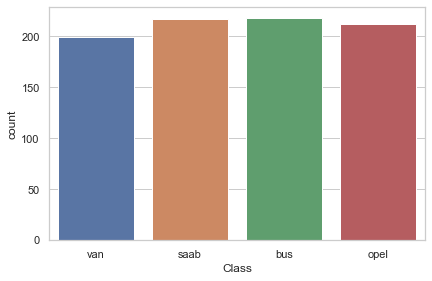

In [6]:
sns.countplot(data=df, x='Class')
df['Class'].value_counts()

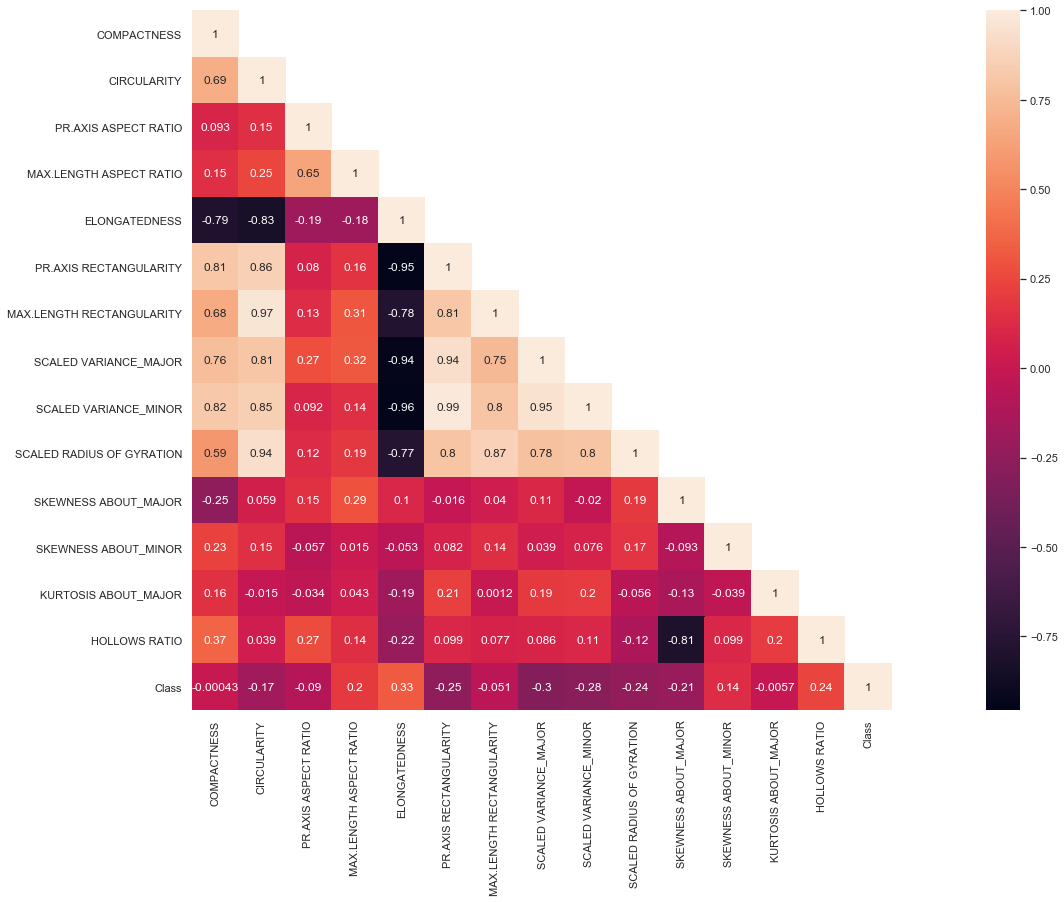

In [7]:
df.Class = df.Class.astype('category').cat.codes

# genera la matriz de correlaciones entre atributos
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [8]:
# creando las variables `X` y `y`
X = df.drop("Class", axis=1).to_numpy()
y = df["Class"].to_numpy()

In [9]:
if HOW_SCALE == "standard":
    scaler=StandardScaler()
    X = scaler.fit_transform(X)
elif HOW_SCALE == "minmax":
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

In [10]:
def mostrar_dataset(x, y):
    fig, ax = plt.subplots(1, 1, figsize=(12, 5))
    
    reduccion = TSNE(n_components=2, init='pca')
    x_new = reduccion.fit_transform(X)
    tmp_df = pd.DataFrame(np.column_stack([x_new, y]))
    tmp_df.columns = ["x1", "x2", "Y"]
    
    sns.scatterplot(x="x1", y="x2", hue="Y", data=tmp_df, ax=ax)    

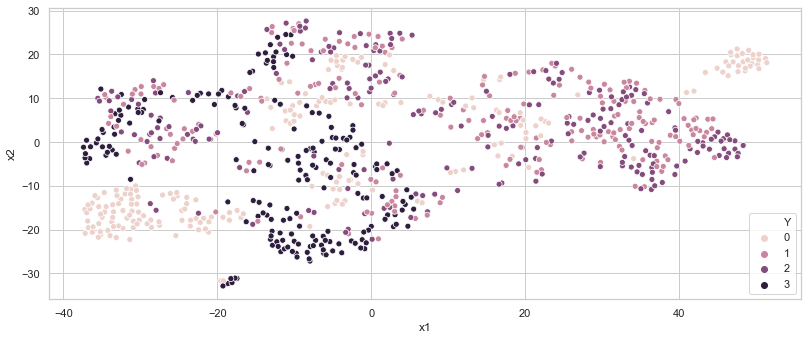

In [11]:
mostrar_dataset(X, y)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.20, random_state=1)

¿Hay alguna característica importante en el dataset que se deba mencionar?

## Ejercicio 3.2

Ingrese manualmente hyper-parámetros para los siguientes modelos. Además, en los modelos RF y XGBoost, fíjese en el gráfico donde se muestran la importancia de las variables para esos modelos.

Genere un gráfico comparando los valores de `accuracy` para los modelos

In [13]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(x_train, y_train)
pred = clf_dt.predict(x_test)
print("Decision Tree: {:.3f}".format(accuracy_score(pred,y_test)))

Decision Tree: 0.712


In [14]:
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=5)
clf_rf.fit(x_train, y_train)
pred = clf_rf.predict(x_test)
print("Random Forest: {:.3f}".format(accuracy_score(pred,y_test)))

Random Forest: 0.735


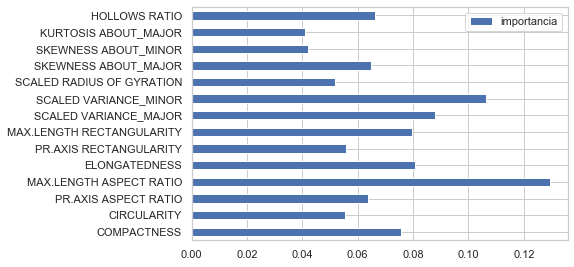

In [15]:
# importancia de variables para RandomForest
tmp = {
    "variables": df.drop("Class", axis=1).columns,
    "importancia": clf_rf.feature_importances_
}

pd.DataFrame(tmp, index=tmp["variables"]).plot(kind="barh")

In [16]:
clf = AdaBoostClassifier(n_estimators=50, learning_rate=0.1)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
print("AdaBoost: {:.3f}".format(accuracy_score(pred, y_test)))

AdaBoost: 0.547


In [17]:
clf_gb = GradientBoostingClassifier(n_estimators=100, random_state=5, max_depth=5, learning_rate=0.1)
clf_gb.fit(x_train, y_train)
pred = clf_gb.predict(x_test)
print("Gradient Boost: {:.3f}".format(accuracy_score(pred,y_test)))

Gradient Boost: 0.729


In [18]:
clf_xgb = xgb.XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=500)
clf_xgb.fit(x_train, y_train)
pred = clf_xgb.predict(x_test)
print("XG Boost: {:.3f}".format(accuracy_score(pred,y_test)))

XG Boost: 0.747


In [19]:
#feat_selector = BorutaPy(clf_xgb, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
#feat_selector.fit(x_train, y_train)

# check selected features - first 5 features are selected
#feat_selector.support_

#X_filtered = feat_selector.transform(x_train)





In [20]:
selection = SelectFromModel(clf_xgb,prefit=True)
select_X_train = selection.transform(x_train)
# train model
selection_model = xgb.XGBClassifier()
selection_model.fit(select_X_train, y_train)
# eval model
select_X_test = selection.transform(x_test)
y_pred = selection_model.predict(select_X_test)
print("XG Boost: {:.3f}".format(accuracy_score(y_pred,y_test)))



datos = pd.DataFrame({'col_name': clf_xgb.feature_importances_}, index=df.drop("Class", axis=1).columns).sort_values(by='col_name', ascending=False)
datos

XG Boost: 0.600


,col_name
ELONGATEDNESS,0.248171
MAX.LENGTH ASPECT RATIO,0.155922
SCALED VARIANCE_MINOR,0.120419
PR.AXIS RECTANGULARITY,0.065492
CIRCULARITY,0.058923
COMPACTNESS,0.054614
MAX.LENGTH RECTANGULARITY,0.048840
HOLLOWS RATIO,0.047533
PR.AXIS ASPECT RATIO,0.044813
SKEWNESS ABOUT_MAJOR,0.041776


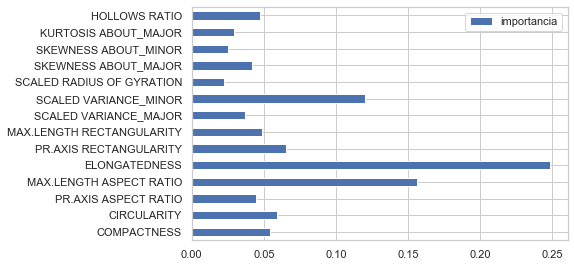

In [21]:
# importancia de variables para el modelo XBoost
tmp = {
    "variables": df.drop("Class", axis=1).columns,
    "importancia": clf_xgb.feature_importances_
}

pd.DataFrame(tmp, index=tmp["variables"]).plot(kind="barh")

In [22]:
clf_svc = SVC(C=1, gamma=0.1)
clf_svc.fit(x_train, y_train)
pred = clf_svc.predict(x_test)
print("SVC: {:.3f}".format(accuracy_score(pred,y_test)))

SVC: 0.529


## Ejercicio 3.3

Seleccione los 2 modelos con mejores prestaciones para este problema e intente mejorar su `accuracy`

Nota: Realice un tuneado de hyper-parámetros. Además, pruebe si el re-escalamiento estandar ayuda a algún modelo. 

## Ejercicio 3.4

Considerando el análisis de correlaciones entre variables en el dataset y la importancia de variables para los modelos de XGBoost y Random Forest, ¿Que se podría hacer para mejorar el `accuracy` para este dataset?

## Ejercicio 3.5

Linear Discriminant Analysis (LDA) es una técnica para transformación de datos, cuyo objetivo es maximizar la separación entre 2 clases creando distribuciones gausianas. La documentación de este método se encuentra en https://scikit-learn.org/0.16/modules/generated/sklearn.lda.LDA.html

Para este ejercicio, probar LDA para reducir dimensiones del dataset y entrenar 2 modelos: SVC y XGBoost. ¿Que `accuracy` logra encontrar ahora y a cuantas dimensiones se redujo el problema?